# Workshop 3 : Data Explorations and Tools

## Prerequisites
* Jupyter Notebooks installed and running

## Objectives
* interactively install [NetCDF](), [MetPy]() and [CartoPy]()
* understand how to load and inspect a NetCDF (`.nc`) file
* understand how to display data on a map using CartoPy
* understand how to use the basic features of MetPy to convert units and plot data accordingly

## netCDF

While [netCDF](http://www.unidata.ucar.edu/software/netcdf/) is commonly referred to as a file format, it is actually a set of _libraries_ and _formats_ that allow users to create and share data, usually in climatology, meteorology, oceanography and GIS applications.

### Installation on Python
Working with NetCDF in Python requires the [netcdf4](https://github.com/Unidata/netcdf4-python) library.  The easiest way to install within Anaconda is with the following:
   
```bash
conda install netcdf4

```


### Loading a Dataset

To load a file using netCDF you must first import the library with the following:

```python
from netCDF4 import Dataset
```

We're going to you a sample data file located in the `./data/` directory.  This dataset is an example `.nc` file [from the MetPy repository of sample files](https://github.com/Unidata/MetPy/tree/master/testdata).

### Code Example

In [35]:
%matplotlib inline
from netCDF4 import Dataset as netcdf_dataset

Looks good!

In [69]:
dataset = netcdf_dataset('./data/gfs_output.nc')

Working with the dataset requires you to understand a little more aboutt, which you can learn about.  The `netCDF4` library provides a `Dataset` class to access the dataset, its attributes and other useful methods for inspecting and manipulating it.  Spend some time to [learn more in the official docs](http://unidata.github.io/netcdf4-python/#netCDF4.Dataset).

Let's look at the dimensions of the dataset:

In [24]:
dataset.dimensions

OrderedDict([('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 201),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 361),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1)])

We can see we have `lat`, `lon` and '`time` dimensions.  We can look further into the file and understand the underlying variables (which will span in some way, the dimensions above).

We will use the [Dataset.variables](http://unidata.github.io/netcdf4-python/#netCDF4.Dataset) attribute. 

Let's see how:

In [39]:
dataset.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (201,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (361,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  units: Hour since 2017-02-28T18:00:00Z
                  long_name: time
              unlimited dimensions: time
              current shape = (1,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('temp', <class 'net

Notice a sampling of the following variables:

| variable | dimensions |
|:--------:|:-----------|
|`lat` | lat |
|`lon` | lon |
|`time` | time |
|`precip_water` | time, lat, lon |
|`winds_300` | time, lat, lon |
| ... | ... |

We can see that `precip_water` runs through the `time`, `lat` and `lon` dimensions, so we can expect that the data we get back will include those three dimensions. 

Notice the `time` variable only has 1 value (and the units are "_Hour since 2017-02-28T18:00:00Z_") and when we inspect it with:
`dataset.variables['time'][0]` we get the answer `3.0`.

In [90]:
dataset.variables['time'][0]

3.0

The last thing to do is to create a plot based on the`temp`, `lat` and `lon` variables.  Let's see how this will be done.

### CartoPy

CartoPy is a commonly used library in the Python stack that allows for high quality mapping to be performed on a variety of data.  You will first need to make sure to [install CartoPy using the instructions](http://scitools.org.uk/cartopy/docs/latest/installing.html#installing).  If you're using Anaconda already, the easiest way to install it is with the following:

```bash
conda install -c conda-forge cartopy
```

CartoPy has a lot of features and it would be wise to actually [read the full documentation](http://scitools.org.uk/cartopy/docs/latest/index.html#) to understand the full scope of its capabilities.

We will simply plot the temperature (`temp`) variable over the `lats` and `lons` on the map using the [`contourf`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf) (`contourf` has a lot of features worth learning).

Now we're ready for a map, please:

In [169]:
# from metpy.constants import K2F 
(dataset.variables['temp'][0][1][1] *  units(dataset.variables['temp'].units)).to('degF')

<Quantity(-16.329994106835926, 'degF')>

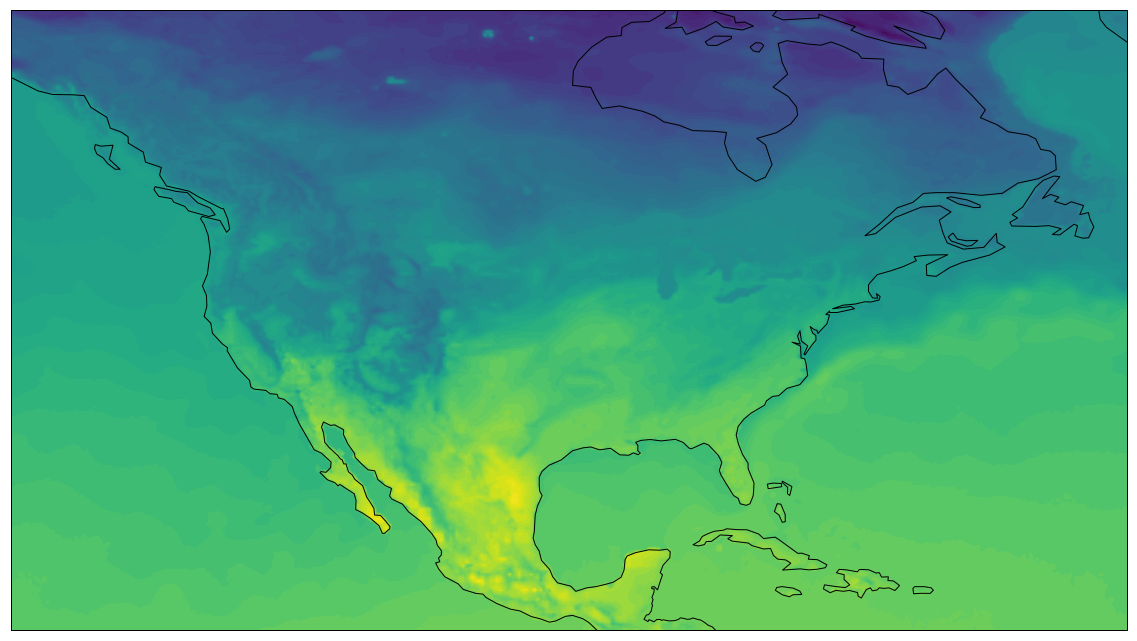

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# set the projection and data to plot on a countour
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

lons = dataset.variables['lon'][:]
lats = dataset.variables['lat'][:]


plt.contourf(lons, lats, temp, 60,
             transform=ccrs.PlateCarree())

# add the coastlines
ax.coastlines()

# show the map (make sure you have executed `%matplotlib inline` in a cell prior to this one or at the begining of this cell)
plt.show()

Yay!

#### Adding a Colorbar

While the image looks like we want it, there is something missing -- we need to know the units of the colors on the map.  To do this we will use the [`colorbar()`](http://matplotlib.org/api/colorbar_api.html) functionality of Matplotlib.  We will just introduce the simple case where the colorbar is implied from the data.

Our new code and map looks like this:

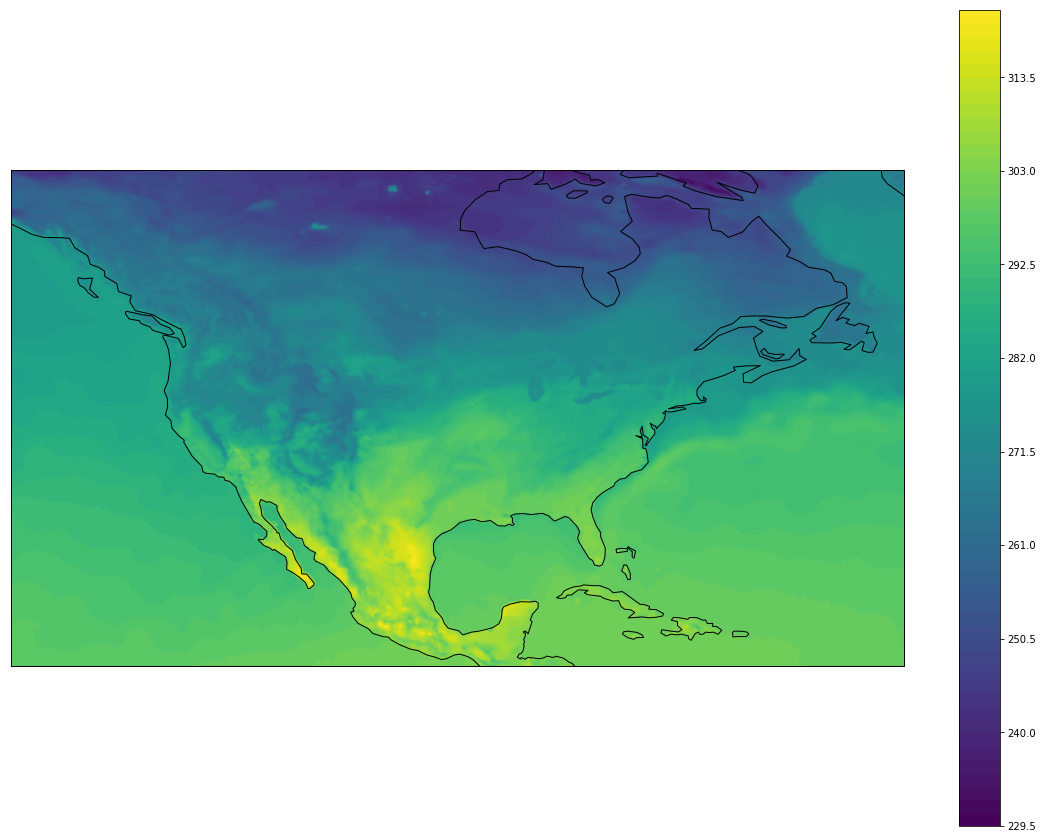

In [157]:
# set the projection and data to plot on a countour
fig = plt.figure(figsize=(20, 15))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, temp, 60,
             transform=ccrs.PlateCarree())

# add the coastlines
ax.coastlines()
plt.colorbar()
plt.show()

**MAPPING WINDS**

In [122]:
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from metpy.units import units
import scipy.ndimage as ndimage
import cartopy.feature as cfeature

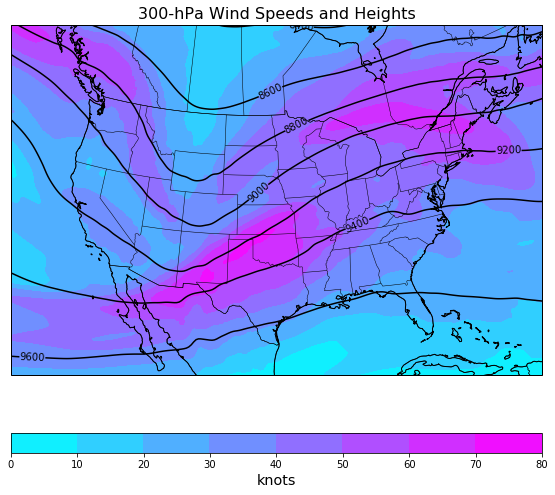

In [176]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

lon_2d, lat_2d = np.meshgrid(dataset.variables['lon'][:], dataset.variables['lat'][:])
winds_300 = dataset.variables['winds_300'][0] * units(dataset.variables['winds_300'].units)
heights_300 = ndimage.gaussian_filter(dataset.variables['heights_300'][0], sigma=1.5, order=0)

# Create the matplotlib figure
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(5, 2, height_ratios=[1, .05, 1, .05, 0], bottom=.05, top=.95, wspace=.1)

# MAP SETUP

## Make state boundaries feature
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces_lines',
                                                scale='50m', facecolor='none')

## Make country borders feature
country_borders = cfeature.NaturalEarthFeature(category='cultural',
                                               name='admin_0_countries',
                                               scale='50m', facecolor='none')
## setup the subplot to place the data
ax1 = plt.subplot(gs[0, 0], projection=crs)
ax1.set_extent([235., 290., 20., 55.])

ax1.coastlines('50m', edgecolor='black', linewidth=0.5)

ax1.add_feature(states_provinces, edgecolor='black', linewidth=0.5)
ax1.add_feature(country_borders, edgecolor='black', linewidth=0.5)

## plot 300-hPa winds and geopotential heights
cf1 = ax1.contourf(lon_2d, lat_2d, winds_300, cmap='cool', transform=ccrs.PlateCarree())
c1 = ax1.contour(lon_2d, lat_2d, heights_300, colors='black', linewidth=2,
                 transform=ccrs.PlateCarree())

## add the label
plt.clabel(c1, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax2 = plt.subplot(gs[1, 0])
cb1 = plt.colorbar(cf1, cax=ax2, orientation='horizontal')
cb1.set_label('knots', size='x-large')
ax1.set_title('300-hPa Wind Speeds and Heights', fontsize=16)

### MetPy

Our last destination will be with the open source library [MetPy](https://unidata.github.io/MetPy/index.html) which provides a number of tools "for reading, visualizing, and performing calculations with weather data".

MetPy has :
* [units conversion](https://unidata.github.io/MetPy/api/generated/metpy.units.html#module-metpy.units) utilities,
* utilities for [reading NEXRAD3, NEXRAD2 and GINI](https://unidata.github.io/MetPy/examples/index.html#file-formats), and
* [gridding (e.g. point interpolation) and [plotting](https://unidata.github.io/MetPy/examples/index.html#plotting) (e.g. skew-T, sounding, station).

We will cover a simple unit conversion.

**CONVERTING UNITS**

Let's use MetPy on our prior map to change the Kelvin temperature units to Farenheit.  We'll use the `units()` feature of the [`metpy.units`](https://unidata.github.io/MetPy/api/generated/metpy.units.html#module-metpy.units) module.

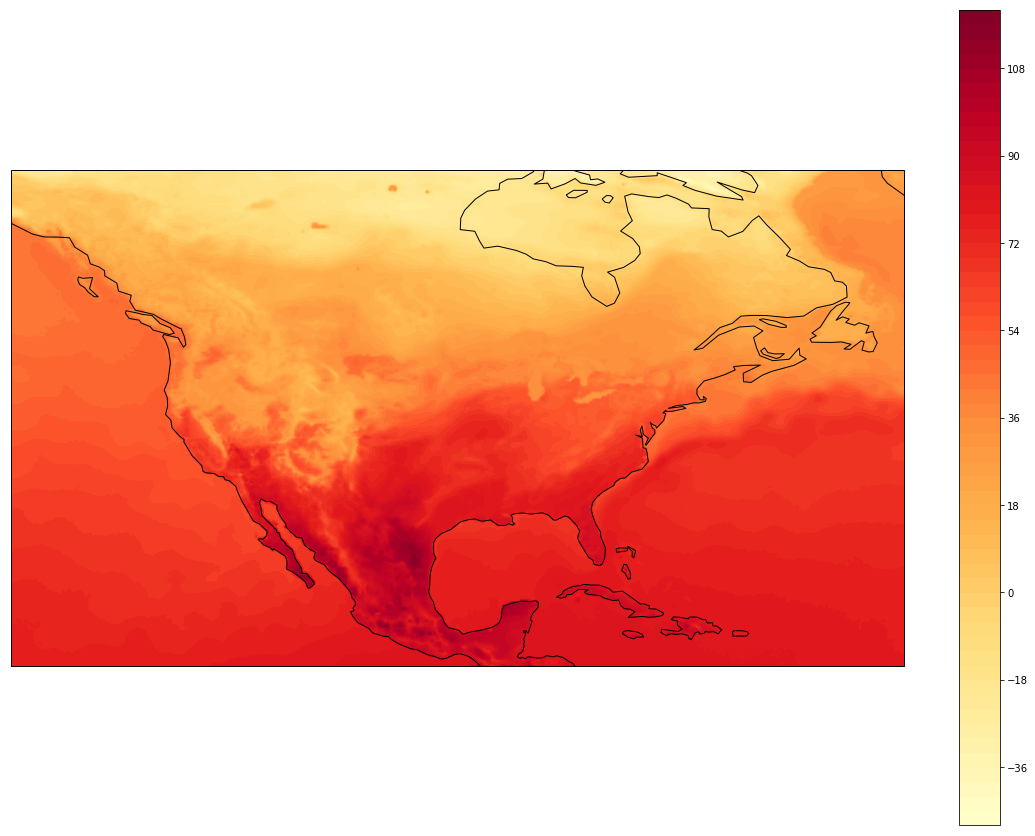

In [177]:
from metpy.units import units

temp_farenheit = (dataset.variables['temp'][0] *  units(dataset.variables['temp'].units)).to('degF')

# set the projection and data to plot on a countour
fig = plt.figure(figsize=(20, 15))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, temp_farenheit, 60,  cmap='YlOrRd', zorder=0,
             transform=ccrs.PlateCarree())

# add the coastlines
ax.coastlines()
plt.colorbar()
plt.show()

Take a look at the [in-depth tutorial and many other examples at MetPy](https://unidata.github.io/MetPy/examples/Four_Panel_Map.html#sphx-glr-examples-four-panel-map-py).